In [2]:
import pandas as pd


from google.colab import drive
drive.mount('/content/drive')

data = pd.read_excel('/content/drive/MyDrive/data_mining/datafurniture.xlsx')
data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,harga,biaya,produk_terjual,keuntungan,stok_barang,diskon,hari pengiriman,kategori,material,warna,lokasi,season,jenis_toko,merek,revenue
0,3488000,2896000,40,592000,105,27,9,Kasur,Plastic,Merah,Rural,Spring,Online,BrandA,63184000
1,7632000,6160000,7,1472000,192,26,6,Kursi,Glass,Biru,Rural,Summer,Online,BrandD,-56336000
2,6064000,4416000,32,1648000,59,21,2,Meja,Metal,Hitam,Suburban,Fall,Online,BrandD,228560000
3,5104000,4496000,48,608000,45,11,2,Meja,Glass,Hijau,Rural,Summer,Retail,BrandD,196176000
4,1920000,1104000,19,816000,35,3,9,Kursi,Glass,Cokelat,Rural,Fall,Online,BrandD,-73408000


     harga    biaya  produk_terjual  keuntungan  stok_barang  diskon  \
0  3488000  2896000              40      592000          105      27   
1  7632000  6160000               7     1472000          192      26   
2  6064000  4416000              32     1648000           59      21   
3  5104000  4496000              48      608000           45      11   
4  1920000  1104000              19      816000           35       3   

   hari pengiriman kategori material    warna    lokasi  season jenis_toko  \
0                9    Kasur  Plastic    Merah     Rural  Spring     Online   
1                6    Kursi    Glass     Biru     Rural  Summer     Online   
2                2     Meja    Metal    Hitam  Suburban    Fall     Online   
3                2     Meja    Glass    Hijau     Rural  Summer     Retail   
4                9    Kursi    Glass  Cokelat     Rural    Fall     Online   

    merek    revenue  
0  BrandA   63184000  
1  BrandD  -56336000  
2  BrandD  228560000  
3  Bra

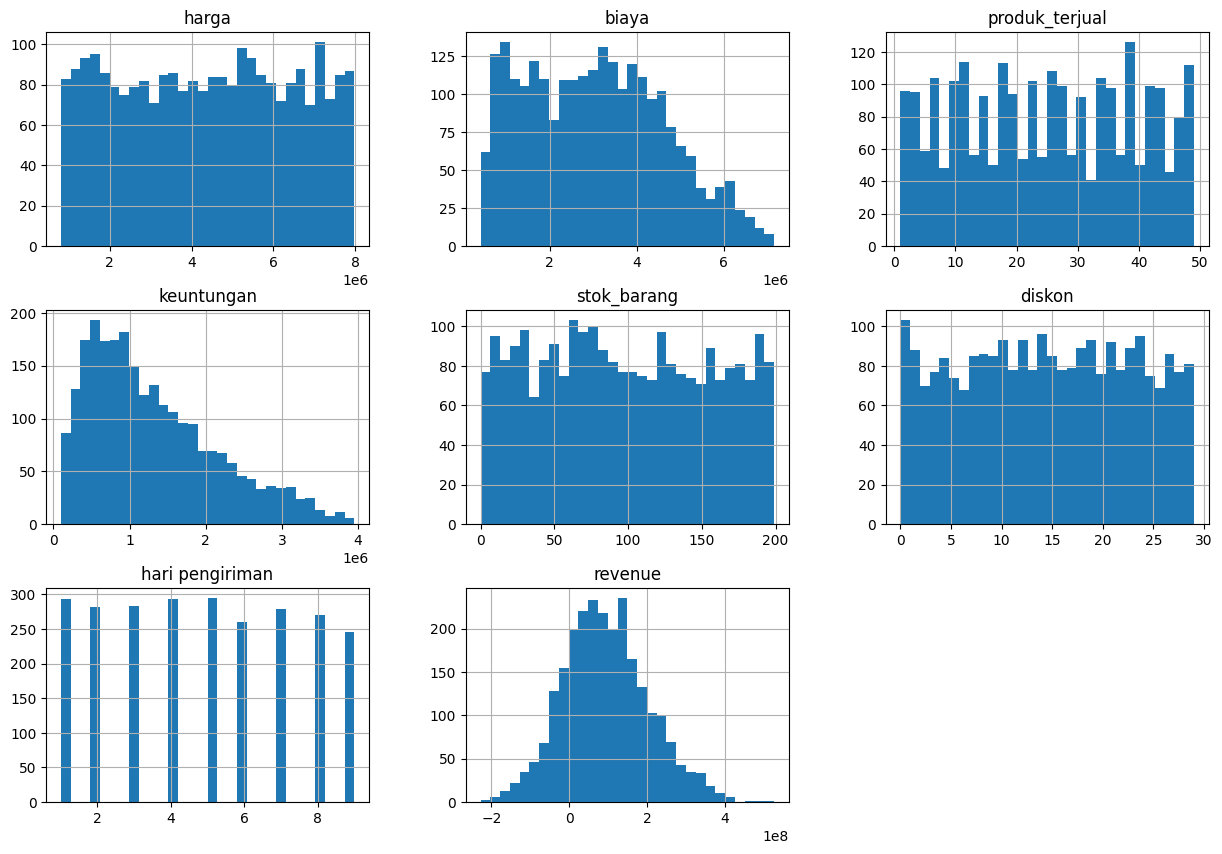

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset


# Lihat beberapa baris pertama dari dataset
print(data.head())

# Periksa tipe data dari setiap kolom
print(data.info())

# Pilih hanya kolom numerik
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Plot distribusi variabel numerik
numerical_data.hist(bins=30, figsize=(15,10))
plt.show()



Berikut adalah penjelasan dari distribusi masing-masing variabel:

Harga (price): Distribusi harga menunjukkan adanya variasi harga yang cukup besar, mulai dari harga yang rendah hingga tinggi.

Biaya (cost): Distribusi biaya juga menunjukkan variasi yang serupa dengan harga.

Produk Terjual (products sold): Variabel ini memiliki distribusi yang bervariasi, menunjukkan jumlah produk yang terjual dalam berbagai kisaran.

Keuntungan (profit): Distribusi keuntungan menunjukkan adanya variasi keuntungan dari rendah hingga tinggi.

Stok Barang (stock): Distribusi stok barang menunjukkan adanya variasi dalam jumlah stok yang tersedia.

Diskon (discount): Distribusi diskon menunjukkan adanya variasi diskon yang diberikan.

Hari Pengiriman (delivery days): Variabel ini memiliki distribusi yang lebih terbatas, dengan variasi jumlah hari pengiriman.

Pendapatan (revenue): Distribusi pendapatan menunjukkan adanya variasi pendapatan dari negatif hingga positif.

In [4]:
# prompt: mengecek outlier dan menghapus outlier pada seluruh kolom numerik

import pandas as pd
import numpy as np

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_no_outliers


# Pilih hanya kolom numerik
numerical_cols = data.select_dtypes(include=np.number).columns

# Hapus outlier pada setiap kolom numerik
data_no_outliers = data.copy()  # Buat salinan data agar data asli tidak berubah
for col in numerical_cols:
    data_no_outliers = remove_outliers_iqr(data_no_outliers, col)

# Reset index
data_no_outliers.reset_index(drop=True, inplace=True)

print("Data setelah outlier dihapus:")
print(data_no_outliers.head())
print(data_no_outliers.info())

Data setelah outlier dihapus:
     harga    biaya  produk_terjual  keuntungan  stok_barang  diskon  \
0  3488000  2896000              40      592000          105      27   
1  7632000  6160000               7     1472000          192      26   
2  6064000  4416000              32     1648000           59      21   
3  5104000  4496000              48      608000           45      11   
4  1920000  1104000              19      816000           35       3   

   hari pengiriman kategori material    warna    lokasi  season jenis_toko  \
0                9    Kasur  Plastic    Merah     Rural  Spring     Online   
1                6    Kursi    Glass     Biru     Rural  Summer     Online   
2                2     Meja    Metal    Hitam  Suburban    Fall     Online   
3                2     Meja    Glass    Hijau     Rural  Summer     Retail   
4                9    Kursi    Glass  Cokelat     Rural    Fall     Online   

    merek    revenue  
0  BrandA   63184000  
1  BrandD  -56336000  

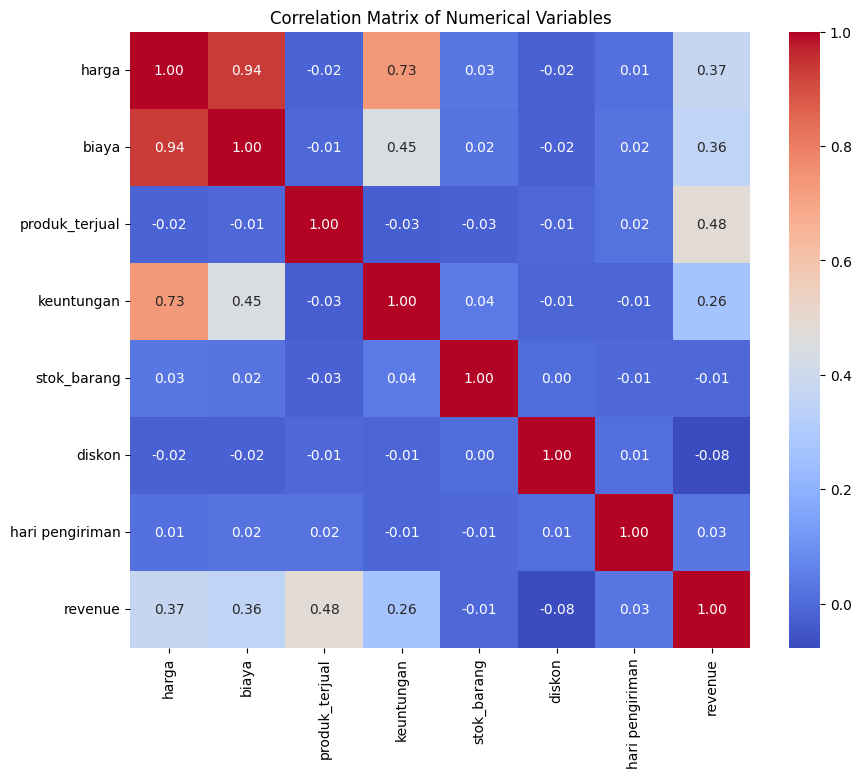

In [5]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate the correlation matrix
correlation_matrix = data_no_outliers[['harga', 'biaya', 'produk_terjual', 'keuntungan', 'stok_barang', 'diskon', 'hari pengiriman', 'revenue']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


Beberapa poin menarik dari matriks ini adalah:

Harga dan Biaya memiliki korelasi positif yang sangat kuat (0.94).

Produk Terjual memiliki korelasi positif yang cukup kuat dengan Pendapatan (0.48).

Keuntungan memiliki korelasi positif yang kuat dengan Harga (0.73) dan Biaya (0.45).

In [6]:

from sklearn.model_selection import train_test_split


# Definisikan variabel independen dan dependen
X = data[['harga', 'biaya', 'produk_terjual', 'keuntungan', 'stok_barang', 'diskon', 'hari pengiriman']]
Y = data['revenue']

# Split data menjadi training set dan test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Tampilkan ukuran dataset hasil splitting
print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)


Ukuran data latih: (2000, 7)
Ukuran data uji: (500, 7)


Penjelasan Kode
Import Library:

train_test_split dari sklearn.model_selection digunakan untuk membagi dataset.

Definisikan Variabel:

Variabel Independen (X): harga, biaya, produk terjual, keuntungan, stok barang, diskon, hari pengiriman.

Variabel Dependen (Y): pendapatan (revenue).

Split Data:

Menggunakan train_test_split untuk membagi dataset menjadi data latih dan data uji dengan proporsi 80% untuk data latih dan 20% untuk data uji.

random_state=42 digunakan untuk memastikan hasil split yang konsisten.

In [7]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split


X = data[['harga', 'biaya', 'produk_terjual', 'keuntungan', 'stok_barang', 'diskon', 'hari pengiriman']]  # Define X here
Y = data['revenue']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Inisialisasi model regresi linear
model = LinearRegression()

# Latih model
model.fit(X_train, Y_train)

# Prediksi pada data uji
Y_pred = model.predict(X_test)

# Inisialisasi model regresi linier
model = LinearRegression()

# Latih model dengan data latih
model.fit(X_train, Y_train)

# Prediksi dengan data uji
Y_pred = model.predict(X_test)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)


Ukuran data latih: (2000, 7)
Ukuran data uji: (500, 7)


Penjelasan Kode
Inisialisasi Model:

LinearRegression() dari sklearn.linear_model digunakan untuk membuat model regresi linier.

Pelatihan Model:

model.fit(X_train, Y_train) digunakan untuk melatih model menggunakan data latih.

Prediksi:

model.predict(X_test) digunakan untuk membuat prediksi menggunakan data uji.

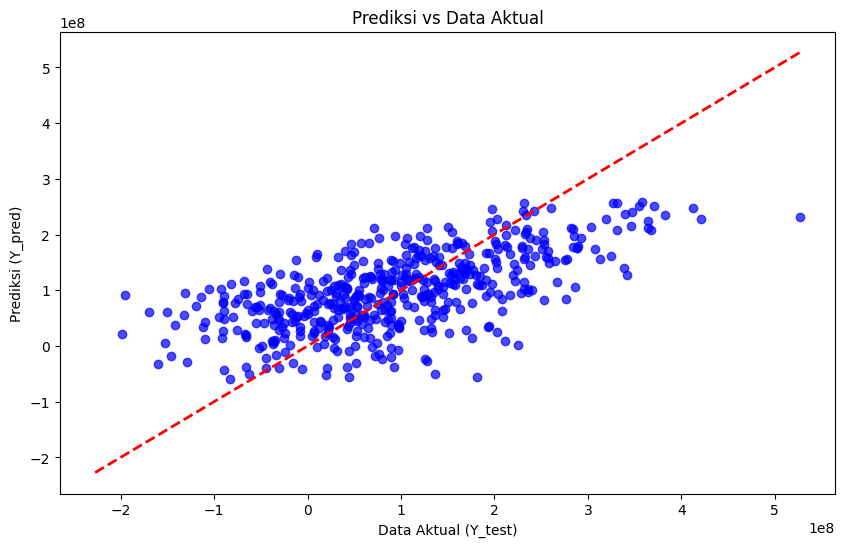

In [8]:
import matplotlib.pyplot as plt
# Visualisasi hasil prediksi vs data aktual
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.7, color='b')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], '--r', linewidth=2)
plt.title('Prediksi vs Data Aktual')
plt.xlabel('Data Aktual (Y_test)')
plt.ylabel('Prediksi (Y_pred)')
plt.show()

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluasi model
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')


MAE: 71807550.39523494
MSE: 8054549539236139.0
R-squared: 0.40036905472987194


Berdasarkan hasil evaluasi model menggunakan tiga metrik statistik, berikut adalah hasilnya:

Mean Absolute Error (MAE): 71,807,550.395

Penjelasan: MAE mengukur rata-rata absolut dari kesalahan prediksi. Dalam konteks ini, nilai MAE sebesar 71,807,550 menunjukkan bahwa, rata-rata, prediksi model berbeda sekitar 71,807,550 unit dari nilai sebenarnya.

Mean Squared Error (MSE): 8.05 x 10^15

Penjelasan: MSE mengukur rata-rata dari kuadrat kesalahan prediksi. Nilai MSE yang sangat besar ini menunjukkan bahwa terdapat beberapa kesalahan prediksi yang sangat besar, yang mempengaruhi keseluruhan nilai MSE.

R-squared (R²): 0.4004

Penjelasan: R² mengukur proporsi variansi dalam variabel dependen (pendapatan) yang dapat dijelaskan oleh variabel independen dalam model. Dalam konteks ini, nilai R² sebesar 0.4004 menunjukkan bahwa sekitar 40% dari variabilitas pendapatan dapat dijelaskan oleh model regresi linier yang kita buat. Ini menunjukkan bahwa model memiliki tingkat penjelasan yang sedang, tetapi masih ada ruang untuk peningkatan.

In [10]:
import pandas as pd

# Menampilkan koefisien regresi
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                  Coefficient
harga            1.349502e+01
biaya            6.702975e+00
produk_terjual   3.821869e+06
keuntungan       6.792050e+00
stok_barang     -2.276052e+04
diskon          -8.212160e+05
hari pengiriman  3.237551e+05


Berikut adalah interpretasi dari setiap koefisien untuk memahami pengaruh masing-masing variabel terhadap pendapatan (revenue):

Harga (price): 13.49502

Setiap peningkatan satu unit dalam harga, dengan asumsi variabel lain konstan, akan meningkatkan pendapatan sebesar 13.49502 unit.

Biaya (cost): 6.702975

Setiap peningkatan satu unit dalam biaya, dengan asumsi variabel lain konstan, akan meningkatkan pendapatan sebesar 6.702975 unit.

Produk Terjual (products sold): 3.821869e+06

Setiap peningkatan satu unit dalam jumlah produk terjual, dengan asumsi variabel lain konstan, akan meningkatkan pendapatan sebesar 3.821869 juta unit. Ini menunjukkan dampak yang sangat besar dari jumlah produk terjual terhadap pendapatan.

Keuntungan (profit): 6.79205

Setiap peningkatan satu unit dalam keuntungan, dengan asumsi variabel lain konstan, akan meningkatkan pendapatan sebesar 6.79205 unit.

Stok Barang (stock): -22760.52

Setiap peningkatan satu unit dalam stok barang, dengan asumsi variabel lain konstan, akan mengurangi pendapatan sebesar 22.76052 unit. Ini menunjukkan bahwa peningkatan stok barang yang tidak terjual dapat berdampak negatif pada pendapatan.

Diskon (discount): -821216.0

Setiap peningkatan satu unit dalam diskon, dengan asumsi variabel lain konstan, akan mengurangi pendapatan sebesar 821.216 unit. Ini menunjukkan bahwa pemberian diskon yang besar dapat berdampak negatif pada pendapatan.

Hari Pengiriman (delivery days): 323755.1

Setiap peningkatan satu unit dalam jumlah hari pengiriman, dengan asumsi variabel lain konstan, akan meningkatkan pendapatan sebesar 323.7551 unit. Ini mungkin menunjukkan bahwa waktu pengiriman yang lebih lama dikaitkan dengan produk yang memiliki nilai lebih tinggi.

Wawasan dari Proyek Data Sains
Berdasarkan interpretasi koefisien di atas, berikut adalah beberapa wawasan yang dapat diperoleh:

Produk Terjual memiliki pengaruh paling besar terhadap pendapatan, menunjukkan pentingnya volume penjualan dalam meningkatkan pendapatan.

Harga dan Biaya juga memiliki pengaruh positif yang signifikan terhadap pendapatan, yang menunjukkan bahwa harga dan biaya produksi yang lebih tinggi dikaitkan dengan pendapatan yang lebih tinggi.

Diskon memiliki pengaruh negatif yang signifikan terhadap pendapatan, menunjukkan bahwa pemberian diskon yang besar dapat mengurangi pendapatan secara signifikan.

Stok Barang memiliki pengaruh negatif terhadap pendapatan, yang menunjukkan bahwa pengelolaan stok yang efisien sangat penting untuk memaksimalkan pendapatan.

In [11]:
# prompt: simpan modelnya dengan .pkl

import pickle

# ... (your existing code) ...

# Simpan model
filename = 'model_furniture.pkl'
pickle.dump(model, open(filename, 'wb'))

print(f"Model berhasil disimpan ke {filename}")

Model berhasil disimpan ke model_furniture.pkl


In [12]:
# prompt: download model yg sdh disimpan

from google.colab import files
files.download('model_furniture.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>